# Загрузка Pandas и очистка данных

In [827]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import itertools

import matplotlib.pyplot as plt

import seaborn as sns

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Для работы с библиотекой Plotly в режиме оффлайн
init_notebook_mode(connected = True)
cf.go_offline()

pd.set_option("display.max_colwidth", 100)
# каталог с исходными данными
folder_path = 'D:/Документы/Programs/DataFile/Проект 3/'
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [828]:
restaurants = pd.read_csv(f'{folder_path}main_task.csv')

In [829]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [830]:
# объявление функций

# функция для вывода среднего количества элементов по группе из вдух ключевых полей
# и вывода списка наиболее часто встречающихся элементов из той же группы в количестве, 
# равном среднему значению всех элементов в группе
def cuisine_mean_list(df_main, df_out, field_count, key1, key2, key3):
    global cuisin_list
    # находим среднее из field_count по двум ключам
    cuisine_mean = pd.DataFrame(df_main.groupby(by=[key1, key2])[field_count].mean()).dropna()
    cuisine_mean.rename(columns={field_count: 'Cuisine_mean'}, inplace=True)
    # сохраняем список с кол-вом повторений по трем ключам
    cuisin_list = pd.DataFrame(cuisine_all.groupby(by=[key1, key2, key3]).size(),\
                                columns=['Count'])
    # дополняем список средними значениями количества по двум ключам
    df_out = df_out.merge(cuisine_mean, how='left', left_index=True, right_index=True)
    # переносим преобразованное в int среднее значение
    df_out.Cuisine_count = df_out.Cuisine_mean.apply(lambda x: int(x))
    # удаляем ненжный столбец и переименовываем нужный
    df_out.drop(['Cuisine_mean'], axis = 1, inplace=True)
    df_out.rename(columns={'Cuisine_count': 'Cuisine_mean'}, inplace=True)
    # составляем список наиболее часто встречающихся из key3 по вдум ключам
    df_out['Often_list'] = df_out.apply(mean_often_list)
    return df_out

# функция для получения списка наиболее часто встречающихся элементов в мультиключе с ограниченим на длину списка для каждого мультиключа
# на вход датафпейм с мультиключем 2х уровней и значением, которое ограничивает кол-во элементов списка из наиболее популярных значений
# + используется внешний датафрейм со списком всех элементов по мультиключу 3х уровней с количеством повторений каждого элемента в мультиключе
# на выходе список со списком из 3-го уровня внешнего датафрейма наиболее частых элементов 
def mean_often_list(mean):
    often_list=[]
    for i, x in enumerate(mean):
        # выделяем индексы для поиска
        idx1 = mean.index[i][0] # первый индекс
        idx2 = mean.index[i][1] # второй индекс
        
        # выбираем сериес из самых часто встречающихся элементов с мультиключом из внешнего датафрейма
        # кол-во элементов ограничено значением x из ключа входящего датафрейма
        limited_list = cuisin_list.loc[idx1, idx2].sort_values('Count', ascending=False)[:x]
        # мин. значение повторений из самых популярных ограниченного списка
        often_min = limited_list.min()[0]
        # и число повторений мин значения ограниченного списка
        often_min_count =(limited_list.Count == often_min).value_counts().loc[True]

        # выбираем сериес всех элементов с мультиключом из внешнего датафрейма
        all_list = cuisin_list.loc[idx1, idx2]
        # сериес всех элементов, равных минимальному значению из самых популярных элементов в ограниченном списке
        all_min = all_list[all_list.Count == often_min]
        # сколько раз мин значение из самых популярных в ограниченном списке встречается во всех элементах с мультиключем
        all_min_count = len(all_min)

        if often_min_count < all_min_count: # если число мин. значений в ограниченном списке меньше чем в общем списке
            # из ограниченног списка убираем все минимальными значения, кроме одного
            often_list_index = limited_list[:(0-often_min_count+1)].index.values
            # их заменяем таким же числом случайных элементов с минимальными значениями из общего списка
            #rand_list_index = np.random.choice(all_min.index.values, size=often_min_count, replace=False)
            #often_list_index = np.append(often_list_index, rand_list_index)
        else:
            # ограниченный список элементов с наиболее частыми повторениями
            often_list_index = limited_list.index.values
        often_list.append(often_list_index)
#        if i > 0: # ограничение для теста
#            break
    return often_list

# функция для вывода самого частого элемента по группе из списка ключевых полей
# и замена найденным значением отсутствующих NaN в главной таблице
def max_keys(df_main, df_out, field_max, keys1, keys2):
    #print(df[[field_count, key1, key2]])
    # находим количество повторений элемента в каждом списке ключей 1
    df_count = pd.DataFrame(df_main.groupby(by=keys1)[field_max].count())
    # находим ключ с макс. количеством повторений элемента в каждом списке ключей 2
    max_count = df_count.groupby(by=keys2).idxmax()
    # и вытаскиваем из него сам элемент
    max_count['Price_often'] = max_count[field_max].apply(lambda x: x[len(keys1)-1])
    # удаляем ненужные столбы
    max_count.drop(field_max, axis=1, inplace=True)
    df_out.drop(field_max, axis=1, inplace=True)
    return max_count


In [831]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

# проанализируем исходный датафреэйм
display(restaurants.head())
display(restaurants.info())
display(restaurants.describe())
display(restaurants.describe(include = ['object']))

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]",/Restaurant_Review-g187147-d1912643-Reviews-R_Yves-Paris_Ile_de_France.html,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food'], ['07/06/2017', '06/19/2016']]",/Restaurant_Review-g189852-d7992032-Reviews-Buddha_Nepal-Stockholm.html,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Opt...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'], ['01/08/2018', '01/06/2018']]",/Restaurant_Review-g186338-d8632781-Reviews-ROKA_Mayfair-London_England.html,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Esplanade-Berlin.html,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Friendly']",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice building but improvements need to be...'], ['11/18/...",/Restaurant_Review-g187309-d6864963-Reviews-Augustiner_Schutzen_Garten-Munich_Upper_Bavaria_Bava...,d6864963


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


None

,Ranking,Rating,Number of Reviews
count,40000.000000,40000.000000,37457.000000
mean,3676.028525,3.993037,124.825480
std,3708.749567,0.668417,295.666352
min,1.000000,1.000000,2.000000
25%,973.000000,3.500000,9.000000
50%,2285.000000,4.000000,33.000000
75%,5260.000000,4.500000,115.000000
max,16444.000000,5.000000,9660.000000


,Restaurant_id,City,Cuisine Style,Price Range,Reviews,URL_TA,ID_TA
count,40000,40000,30717,26114,40000,40000,40000
unique,11909,31,9007,3,33516,39980,39980
top,id_633,London,['Italian'],$$ - $$$,"[[], []]",/Restaurant_Review-g187514-d11698990-Reviews-Verdello_Restaurante-Madrid.html,d7337366
freq,18,5757,1032,18412,6471,2,2


Есть только три числовых признак, один из которых целевой (Rating), т.е. для обучения модели можно использовать только 2. Добавим числовые признаки.
В трех столбцах имеются отсутствующие данные, которые необходимо будет заполнить

добавим данные по городам:
1. Region - Регион
2. Sub_Region - Субрегион
3. Population - Население (оставим в тыс. чел)
4. Its_capital - Признак столицы страны (1)
5. Latitude - Географическая широта расположения

In [832]:
city_pop = pd.read_csv(f'{folder_path}City_Populeshion.csv', delimiter=';')
city_pop.drop(['Country','Country_name', 'City_original_name'], axis = 1, inplace=True)
city_pop['Population'] = city_pop['Population']/1000
restaurants = restaurants.merge(city_pop, on='City', how='left')
display(city_pop.info())
display(restaurants.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         80 non-null     object 
 1   Sub_Region   80 non-null     object 
 2   Region       80 non-null     object 
 3   Its_capital  80 non-null     int64  
 4   Population   80 non-null     float64
 5   Latitude     80 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.9+ KB


None

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Sub_Region,Region,Its_capital,Population,Latitude
10042,id_10222,London,NaN,10231.0,5.0,NaN,4.0,"[['Excellent! A very enjoyable dining experie...', 'great food and company'], ['09/14/2015', '09...",/Restaurant_Review-g186338-d8561195-Reviews-Naples_Delicacies-London_England.html,d8561195,Northern Europe,Europe,1,8173.900,51.514125
9708,id_3676,Prague,NaN,3685.0,3.0,NaN,2.0,"[[], []]",/Restaurant_Review-g274707-d7680806-Reviews-Cukrarna_Sofie-Prague_Bohemia.html,d7680806,Eastern Europe,Europe,1,1294.513,50.083333
17865,id_4556,Madrid,"['Vegetarian Friendly', 'Gluten Free Options']",4558.0,3.5,$$ - $$$,76.0,"[['Quick and poor lunch', 'Good for quick lunch'], ['10/27/2015', '07/05/2015']]",/Restaurant_Review-g187514-d5864196-Reviews-Paquita_Bar_Restaurante-Madrid.html,d5864196,Southern Europe,Europe,1,3265.038,40.408566
33602,id_1908,Hamburg,NaN,1912.0,3.5,NaN,8.0,"[['Quick stopover. Average quality'], ['11/03/2015']]",/Restaurant_Review-g187331-d4501283-Reviews-Sutsche_Oevelgoenne_Betriebsgesellschaft_mbH-Hamburg...,d4501283,Western Europe,Europe,0,1762.791,53.550000
26302,id_6339,Barcelona,"['Spanish', 'Mediterranean']",6340.0,3.5,$$ - $$$,32.0,"[['Tapas dinner', 'Absolutely disgusting'], ['04/24/2017', '11/08/2017']]",/Restaurant_Review-g187497-d5608393-Reviews-Cafe_de_Galiza-Barcelona_Catalonia.html,d5608393,Southern Europe,Europe,0,1615.448,41.398371


# Обработка Cuisine Style - тип кухни

In [833]:
# сохраним признак отсутствия кухни
restaurants['Cuisine_Style_isnan'] = (restaurants['Cuisine Style'].isna()).astype('uint8')
# преобразуем списки, сохраненные в виде текста в список
restaurants['Cuisine Style'] = restaurants['Cuisine Style'].apply(lambda x: x[1:-1].replace("'", '').split(', ') \
                                                                  if isinstance(x, str) else x )
# сохраним количество представленных рестораном кухонь
restaurants['Cuisine_count'] = restaurants['Cuisine Style'].apply(lambda x: len(x) if isinstance(x, list) else x)
# разворачиваем список кухнь в строки по каждому ресторану
cuisine_all = restaurants[['Restaurant_id','City','Cuisine Style','Sub_Region', 'Region']].explode('Cuisine Style').reset_index(drop=True)
# сохраняем список ресторанов с отсутствием кухни для дальнейшей обработки
cuisine_nan = restaurants.query('Cuisine_Style_isnan == 1')[['Restaurant_id', 'City', 'Sub_Region', 'Region']]
# проверим, есть ли у одного ресторана в одном городе больше одной строки в датафрейме для получения среднего значения
restaurants.groupby(['City','Restaurant_id']).count().query('Ranking > 1')

,,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Sub_Region,Region,Its_capital,Population,Latitude,Cuisine_Style_isnan,Cuisine_count
City,Restaurant_id,,,,,,,,,,,,,,,


таких записей нет, значит не найти среднего значения ни по одному параметру у одного ресторана в одном городе

In [834]:
# проверяем рестораны без записей о кухне
# у одного ресторана в одном субрегионе есть как минимум одна запись в датафрейме c заполненной кухней?
sreg_id_cuisine_nan = pd.DataFrame(restaurants[(restaurants.Sub_Region + restaurants.Restaurant_id)\
                                               .isin(cuisine_nan.Sub_Region + cuisine_nan.Restaurant_id)]\
                                               .groupby(by=['Sub_Region','Restaurant_id']).count().query('Cuisine_count > 0')\
                                               .loc[:,'Cuisine_count'])
sreg_id_cuisine_nan

Cuisine_count
Sub_Region     Restaurant_id               
Eastern Europe id_1003                    2
               id_1005                    1
               id_1007                    2
               id_1009                    2
               id_1022                    1
...                                     ...
Western Europe id_993                     1
               id_994                     1
               id_995                     5
               id_996                     2
               id_999                     2

[3807 rows x 1 columns]

In [835]:
# записи есть, значит можно заполнить отсутствующие значения кухонь наиболее частыми в ресторане с одним id в одном субрегионе
# анализ кухни по id ресторана и субрегиону
# дополняем список без кухонь средними значениями часла кухонь, и списком наиболее часто повторяющихся кухонь в количестве среднего значения
sreg_id_cuisine_nan = cuisine_mean_list(restaurants, sreg_id_cuisine_nan, 'Cuisine_count', 'Sub_Region', 'Restaurant_id', 'Cuisine Style')

# объединяем в общую таблицу с наиболее частыми кухнями по субрегиону, ресторану
restaurants = restaurants.merge(sreg_id_cuisine_nan, how='left', left_on=['Sub_Region', 'Restaurant_id'], right_index=True)
# заполняем отсутствующие значения средними по субрегиону, ресторану
restaurants['Cuisine Style'].fillna(restaurants['Often_list'], inplace=True)
restaurants['Cuisine_count'].fillna(restaurants['Cuisine_mean'], inplace=True)
# удалим ненужные поля
restaurants.drop(['Cuisine_mean', 'Often_list'], axis = 1, inplace=True)
# выбираем рестораны все еще остающиеся без кухни
cuisine_nan = restaurants[restaurants['Cuisine Style'].isna()][['Restaurant_id', 'City', 'Region']]
cuisine_nan

,Restaurant_id,City,Region
8,id_2690,Vienna,Europe
10,id_6578,Barcelona,Europe
21,id_5844,Madrid,Europe
28,id_10057,Paris,Europe
29,id_8349,Madrid,Europe
...,...,...,...
39934,id_11032,London,Europe
39965,id_5720,Rome,Europe
39986,id_7274,Madrid,Europe
39988,id_4968,Berlin,Europe


In [836]:
# у одного ресторана в одном регионе есть как минимум одна запись в датафрейме c заполненной кухней?
reg_id_cuisine_nan = pd.DataFrame(restaurants[(restaurants.Region + restaurants.Restaurant_id)\
                                               .isin(cuisine_nan.Region + cuisine_nan.Restaurant_id)]\
                                               .groupby(by=['Region','Restaurant_id']).count().query('Cuisine_count > 0')\
                                               .loc[:,'Cuisine_count'])
reg_id_cuisine_nan

Cuisine_count
Region Restaurant_id               
Europe id_10017                   1
       id_10021                   1
       id_10034                   1
       id_10069                   1
       id_1008                    5
...                             ...
       id_993                    10
       id_9942                    1
       id_9952                    1
       id_9957                    1
       id_9992                    1

[2193 rows x 1 columns]

In [837]:
# записи есть, значит можно заполнить отсутствующие значения кухонь наиболее частыми в ресторане с одним id в одном регионе
# анализ кухни по id ресторана и региону
# дополняем список без кухонь средними значениями часла кухонь, и списком наиболее часто повторяющихся кухонь в количестве среднего значения
reg_id_cuisine_nan = cuisine_mean_list(restaurants, reg_id_cuisine_nan, 'Cuisine_count', 'Region', 'Restaurant_id', 'Cuisine Style')

# объединяем в общую таблицу с наиболее частыми кухнями по региону, ресторану
restaurants = restaurants.merge(reg_id_cuisine_nan, how='left', left_on=['Region', 'Restaurant_id'], right_index=True)
# заполняем отсутствующие значения средними по региону, ресторану
restaurants['Cuisine Style'].fillna(restaurants['Often_list'], inplace=True)
restaurants['Cuisine_count'].fillna(restaurants['Cuisine_mean'], inplace=True)
# удалим ненужные поля
restaurants.drop(['Cuisine_mean', 'Often_list'], axis = 1, inplace=True)
# выбираем рестораны все еще остающиеся без кухни
cuisine_nan = restaurants[restaurants['Cuisine Style'].isna()][['Restaurant_id', 'City']]
cuisine_nan

,Restaurant_id,City
28,id_10057,Paris
51,id_10142,London
59,id_10032,Paris
60,id_8755,London
68,id_8648,Paris
...,...,...
39886,id_8696,Madrid
39909,id_13452,Paris
39918,id_15736,London
39988,id_4968,Berlin


In [838]:
# в ресторанах одного города регтона есть как минимум одна запись в датафрейме c заполненной кухней?
city_cuisine_nan = pd.DataFrame(restaurants[restaurants.City.isin(cuisine_nan.City)]\
                                               .groupby(by=['Region', 'City']).count().query('Cuisine_count > 0')\
                                               .loc[:,'Cuisine_count'])
city_cuisine_nan

Cuisine_count
Region City                    
Europe Amsterdam           1081
       Barcelona           2566
       Berlin              2063
       Brussels            1057
       Hamburg              947
       Lisbon              1288
       London              5003
       Lyon                 891
       Madrid              2872
       Milan               2064
       Munich               891
       Paris               4269
       Prague              1433
       Rome                2034
       Stockholm            818
       Vienna              1161

In [839]:
# записи есть, значит можно заполнить отсутствующие значения кухонь наиболее частыми в одном городе
# анализ кухни по городу
# дополняем список без кухонь средними значениями часла кухонь, и списком наиболее часто повторяющихся кухонь в количестве среднего значения
city_cuisine_nan = cuisine_mean_list(restaurants, city_cuisine_nan, 'Cuisine_count', 'Region', 'City', 'Cuisine Style')
# объединяем В общую таблицу с наиболее частыми кухнями по городу
restaurants = restaurants.merge(city_cuisine_nan, how='left', left_on=['City'], right_on='City')
# заполняем отсутствующие значения средними по городу
restaurants['Cuisine Style'].fillna(restaurants['Often_list'], inplace=True)
restaurants['Cuisine_count'].fillna(restaurants['Cuisine_mean'], inplace=True)
# удалим ненужные поля
restaurants.drop(['Cuisine_mean', 'Often_list'], axis = 1, inplace=True)
# выбираем рестораны все еще остающиеся без кухни
cuisine_nan = restaurants[restaurants['Cuisine Style'].isna()][['Restaurant_id', 'City']]
cuisine_nan

,Restaurant_id,City


все значения с типами кухонь заполнены

In [840]:
# создадим список с уникальными кухнями и их кол-ом, представленным во всех ресторанах
# запоолняем словарь из типов кухнь
cuisine = set() # создаем набор из типов кухнь. При добавлении повторы исключаются автоматически
for cuisines_rest in restaurants[restaurants['Cuisine Style'].notna()]['Cuisine Style']:
    for x in cuisines_rest:
        cuisine.add(x)
# подсчет ресторанов, представляющих каждую кухню
cuisine_rest_count = pd.DataFrame(list(cuisine), columns=['cuisine']) # создаем датафрейм уникальных кухонь
# заполняем число ресторанов, представляющих кухню
cuisine_rest_count['rest_count'] = cuisine_rest_count.cuisine.apply(lambda x: \
                                                                        restaurants[restaurants['Cuisine Style']\
                                                                        .astype('str').str.contains(x)].Restaurant_id.count())
# кухни представленные в менее 0.5% ресторанов
cuisine_other = cuisine_rest_count[cuisine_rest_count.rest_count < restaurants.Restaurant_id.count()*0.5/100].copy()
# удаляем кухни, представленные в менее 0.5% ресторанов
cuisine_rest_count.drop(index=cuisine_other.index, inplace=True)
# вместо удаленных кухонь добавляем кухню "other"
cuisine_rest_count = pd.concat([cuisine_rest_count,\
           pd.DataFrame({'cuisine': ['Other'], 'rest_count': [cuisine_other.rest_count.sum()]})], ignore_index=True)

# развернем список кухнь по столбцам
# устанавливаем 1, если кухня из названия столбца есть в ресторане, иначе 0
# все столбцы, корме "other" (полсденяя строка)
for cuisine in cuisine_rest_count.cuisine[:-1]:
    restaurants[f'Cuisine_{cuisine}'] = restaurants['Cuisine Style'].apply(lambda x: 1 if cuisine in x else 0)
# устанавливаем 1 если кухня представленные в менее 0.5% ресторанов, иначе 0
for cuisine in cuisine_other.cuisine:
    restaurants['Cuisine_Other'] = restaurants['Cuisine Style'].apply(lambda x: 1 if cuisine in x else 0)

# сохраним количество представленных рестораном кухонь с учетом замененных на other
restaurants['Cuisine_count'] = restaurants.loc[:,list('Cuisine_' + cuisine_rest_count.cuisine)].sum(axis=1)

# Обработка Price Range - уровень цен

In [841]:
# сохраним признак отсутствия цены
restaurants['Price_Range_isnan'] = (restaurants['Price Range'].isna()).astype('uint8')

# сохраняем список ресторанов с отсутствием цены для дальнейшей обработки
price_nan = restaurants.query('Price_Range_isnan == 1')[['Restaurant_id', 'City', 'Sub_Region', 'Region']]

# обрабатываем рестораны без стоимостей
# у одного ресторана в одном субрегионе есть как минимум одна запись в датафрейме c заполненной стоимостью?
sreg_id_price_nan = pd.DataFrame(restaurants[(restaurants.Sub_Region + restaurants.Restaurant_id)\
                                               .isin(price_nan.Sub_Region + price_nan.Restaurant_id)]\
                                               .groupby(by=['Sub_Region','Restaurant_id']).count().query('`Price Range` > 0')\
                                               .loc[:,'Price Range'])
sreg_id_price_nan

Price Range
Sub_Region     Restaurant_id             
Eastern Europe id_1003                  2
               id_1004                  1
               id_1005                  1
               id_1007                  1
               id_1009                  2
...                                   ...
Western Europe id_993                   1
               id_994                   1
               id_995                   5
               id_996                   2
               id_999                   2

[4583 rows x 1 columns]

In [842]:
# записи есть, значит можно заполнить отсутствующие значения стоимости наиболее частыми в ресторане с одним id в одном субрегионе
# анализ стоимости по id ресторана и субрегиону
# заполнение частым значением по группе
max_count = max_keys(restaurants, sreg_id_price_nan, 'Price Range', keys1=['Sub_Region','Restaurant_id', 'Price Range'], \
         keys2=['Sub_Region','Restaurant_id'])
# объединяем таблицу c клбчами без элементов наиболее частым элементом по ключу 2
sreg_id_price_nan = sreg_id_price_nan.merge(max_count, how='left', left_index=True, right_index=True)
# объединяем главную таблицу наиболее частым элементом по ключу 2
restaurants = restaurants.merge(sreg_id_price_nan, how='left', left_on=['Sub_Region','Restaurant_id'], right_index=True)
# заполняем отсутствующие значения наиболее частым элементом по ключу 2
restaurants['Price Range'].fillna(restaurants['Price_often'], inplace=True)
# удаляем ненужные столбцы
restaurants.drop('Price_often', axis=1, inplace=True)
# выбираем рестораны все еще остающиеся без уровней ст-ти
price_nan = restaurants[restaurants['Price Range'].isna()][['Restaurant_id', 'Region']]
price_nan

,Restaurant_id,Region
7,id_825,Europe
8,id_2690,Europe
10,id_6578,Europe
16,id_5257,Europe
21,id_5844,Europe
...,...,...
39983,id_2487,Europe
39986,id_7274,Europe
39988,id_4968,Europe
39989,id_8887,Europe


In [843]:
# у одного ресторана в одном регионе есть как минимум одна запись в датафрейме c заполненной стоимостью?
reg_id_price_nan = pd.DataFrame(restaurants[(restaurants.Region + restaurants.Restaurant_id)\
                                               .isin(price_nan.Region + price_nan.Restaurant_id)]\
                                               .groupby(by=['Region','Restaurant_id']).count().query('`Price Range` > 0')\
                                               .loc[:,'Price Range'])
reg_id_price_nan

Price Range
Region Restaurant_id             
Europe id_10004                 1
       id_10017                 1
       id_10021                 1
       id_10027                 1
       id_10034                 1
...                           ...
       id_9942                  1
       id_9957                  1
       id_996                   4
       id_998                   5
       id_9989                  1

[3020 rows x 1 columns]

In [844]:
# записи есть, значит можно заполнить отсутствующие значения стоимости наиболее частыми в ресторане с одним id в одном регионе
# анализ стоимости по группе (id ресторана и регион)
# получаем частые значения по группе
max_count = max_keys(restaurants, reg_id_price_nan, 'Price Range', keys1=['Region','Restaurant_id', 'Price Range'], \
         keys2=['Region','Restaurant_id'])
# объединяем таблицу c клбчами без элементов наиболее частым элементом по ключу 2
reg_id_price_nan = reg_id_price_nan.merge(max_count, how='left', left_index=True, right_index=True)
# объединяем главную таблицу наиболее частым элементом по ключу 2
restaurants = restaurants.merge(reg_id_price_nan, how='left', left_on=['Region','Restaurant_id'], right_index=True)
# заполняем отсутствующие значения наиболее частым элементом по ключу 2
restaurants['Price Range'].fillna(restaurants['Price_often'], inplace=True)
# удаляем ненужные столбцы
restaurants.drop('Price_often', axis=1, inplace=True)
# выбираем рестораны все еще остающиеся без уровней ст-ти
price_nan = restaurants[restaurants['Price Range'].isna()][['Restaurant_id', 'City']]
price_nan

,Restaurant_id,City
21,id_5844,Madrid
28,id_10057,Paris
29,id_8349,Madrid
45,id_11945,London
46,id_8460,Madrid
...,...,...
39909,id_13452,Paris
39918,id_15736,London
39988,id_4968,Berlin
39989,id_8887,London


In [845]:
# в одном городе есть как минимум одна запись в датафрейме c заполненной стоимостью?
city_price_nan = pd.DataFrame(restaurants[restaurants.City.isin(price_nan.City)].groupby(by=['City']).count()\
                                                                  .query('`Price Range` > 0').loc[:,'Price Range'])
city_price_nan

,Price Range
City,
Amsterdam,1077
Barcelona,2430
Berlin,1970
Brussels,1051
Budapest,815
Copenhagen,658
Hamburg,944
Lisbon,1276
London,4390


In [846]:
# записи есть, значит можно заполнить отсутствующие значения стоимости наиболее частыми в одном городе
# анализ стоимости по группе (город)
# получаем частые значения по группе
max_count = max_keys(restaurants, city_price_nan, 'Price Range', keys1=['City', 'Price Range'], \
         keys2=['City'])
# объединяем таблицу c клбчами без элементов наиболее частым элементом по ключу 2
city_price_nan = city_price_nan.merge(max_count, how='left', left_index=True, right_index=True)
# объединяем главную таблицу наиболее частым элементом по ключу 2
restaurants = restaurants.merge(city_price_nan, how='left', left_on=['City'], right_index=True)
# заполняем отсутствующие значения наиболее частым элементом по ключу 2
restaurants['Price Range'].fillna(restaurants['Price_often'], inplace=True)
# удаляем ненужные столбцы
restaurants.drop('Price_often', axis=1, inplace=True)
# выбираем рестораны все еще остающиеся без уровней ст-ти
price_nan = restaurants[restaurants['Price Range'].isna()][['Restaurant_id', 'City']]
price_nan

,Restaurant_id,City


все уровни цен заполнены

In [847]:
# преобразуем уровень цен в более наглядные для назв. столбцов, используя словарь
price_dict = {'$': 'low', '$$ - $$$': 'middle', '$$$$': 'high'}
restaurants['Price Range'] = restaurants['Price Range'].replace(to_replace=price_dict)

# преобразуем уровень цен в dummies переменные
restaurants = pd.get_dummies(restaurants, columns=["Price Range"], prefix='Price_Range', dtype="uint8")

# Обработка Reviews - два отзыва по ресторану

In [848]:
# заполним отсутствие отзывов NaN, строкой '[[], []]', как в большинстве отсутствия отзывов
restaurants['Reviews'].fillna('[[], []]', inplace=True)
# сохраним признак отсутствия количества отзывов о ресторане
restaurants['Number_of_Reviews_isnan'] = (restaurants['Number of Reviews'].isna()).astype('uint8')
# сохраним признак отсутствия обоих отзывов о ресторане
restaurants['Reviews_all_isnan'] = (restaurants['Reviews'] == '[[], []]').astype('uint8')
# преобразуем списки, сохраненные в виде текста в список, с сохранением вложенности списков
# пустые отзывы [] пропускаем 
restaurants['Reviews'] = restaurants.query('Reviews_all_isnan == 0').Reviews.apply(lambda x: list(a.split(', ') \
                                                                            for a in x[2:-2].replace("'", '').split('], [')))
# сохраним признак отсутствия второго отзыва
restaurants['Reviews_second_isnan'] = restaurants[restaurants['Reviews_all_isnan'] == 0].Reviews.\
                                                    apply(lambda x: True if len(x[1]) < 2 else False).astype('uint8')
restaurants['Reviews_second_isnan'].fillna(1, inplace=True)

# преобразуем даты обзоров в datetime, и сохраним как отдельные признаки для дальнейшего анализа
# дата первого обзора
restaurants['Review_date_01'] = restaurants.query('Reviews_all_isnan == 0').Reviews.apply(lambda x: \
                                                                                       datetime.strptime(x[1][0], '%m/%d/%Y'))
# дата второго обзора, если он есть
restaurants['Review_date_02'] = restaurants.query('Reviews_second_isnan == 0').\
                                            Reviews.apply(lambda x: None if len(x[1]) < 2 else \
                                                          datetime.strptime(x[1][1], '%m/%d/%Y'))

# анализ дат отзывов
print(f'Наибольшие даты отзывов. 1-го: {restaurants.Review_date_01.max().strftime("%d.%m.%Y")}, \
2-го: {restaurants.Review_date_02.max().strftime("%d.%m.%Y")}')
print(f'Наименьшие даты отзывов. 1-го: {restaurants.Review_date_01.min().strftime("%d.%m.%Y")}, \
2-го: {restaurants.Review_date_02.min().strftime("%d.%m.%Y")}')
print(f'Средние даты отзывов.    1-го: {restaurants.Review_date_01.mean().strftime("%d.%m.%Y")}, \
2-го: {restaurants.Review_date_02.mean().strftime("%d.%m.%Y")}')

Наибольшие даты отзывов. 1-го: 26.02.2018, 2-го: 26.02.2018
Наименьшие даты отзывов. 1-го: 21.04.2004, 2-го: 14.11.2007
Средние даты отзывов.    1-го: 05.05.2017, 2-го: 24.02.2017


In [849]:
# посмотрим на распределение количества отзывов по датам
# кол-во первых отзывов по дням сохраняем в датафрейм
date_count = pd.DataFrame(restaurants.groupby(['Review_date_01']).size(),columns=['date_01'])
# кол-во вторых отзывов по дням
date_count_2 = restaurants.groupby(['Review_date_02']).size()
# объединяем по столбцам кол-во отзывов по дням
date_count = pd.concat([date_count, date_count_2], axis = 1)
date_count.rename(columns={0:'date_02'}, inplace=True)
# добавляем кол-во всех отзывов по дням
date_count.fillna(0, inplace=True)
date_count['all'] = date_count.date_01 + date_count.date_02

# выводим график по распределению количества отзывов по датам в хронологическом порядке
np.sqrt(date_count).iplot()

In [850]:
# при увеличении маштаба можно увидеть, что переодически относительно постоянно отзывы стали формироваться с 19.08.2011
# отзывы ранее этой даты будем считать выбросами, а по строкам с этими выбросами данные возьмем по средним значениям в группах
# т.е. далее будем использовать отзывы, начиная с даты 19.08.2011, для формирования новых признаков
date_min = datetime(2011, 8, 19, 0, 0, 0)

# добавим разность в днях между отзывами одного ресторана
restaurants['Review_delta'] = abs(restaurants[restaurants.Review_date_02 >= date_min].Review_date_01 -\
                                  restaurants[restaurants.Review_date_02 >= date_min].Review_date_02).astype("timedelta64[D]")
# добавим кол-во дней, прошедших с даты посленего обтзыва о ресторане до выбранной даты (максимальной даты отзывов)
restaurants['Review_delta_last'] = restaurants[restaurants.Review_date_02 >= date_min]\
                                            .assign(Review_delta_last=lambda x: datetime(2018, 2, 26, 0, 0, 0) -\
                                                                        np.maximum(x['Review_date_01'],x['Review_date_02']))\
                                                .Review_delta_last.astype("timedelta64[D]")
# сохраняем список ресторанов с отсутствием дней между датами отзывов для дальнейшей обработки
rdelta_nan = restaurants[restaurants.Review_delta.isna()][['Restaurant_id', 'Sub_Region']]
rdelta_nan

,Restaurant_id,Sub_Region
3,id_3456,Western Europe
8,id_2690,Western Europe
10,id_6578,Southern Europe
14,id_4773,Southern Europe
16,id_5257,Western Europe
...,...,...
39988,id_4968,Western Europe
39989,id_8887,Northern Europe
39991,id_6655,Western Europe
39994,id_7074,Western Europe


In [851]:
# анализ временного периода в днях между датами отзывов 
print(f'Кол-во дней между отзывами одного ресторана в одном городе: \n\
Максимальное: {restaurants.Review_delta.max()}\n\
Минимальное: {restaurants.Review_delta.min()}\n\
Среднее: {round(restaurants.Review_delta.mean())}')
# анализ временного периода в днях между последней датой отзыва и максимальной датой 
print(f'Кол-во дней между последней датой отзыва одного ресторана в одном городе и максимальной датой: \n\
Максимальное: {restaurants.Review_delta_last.max()}\n\
Минимальное: {restaurants.Review_delta_last.min()}\n\
Среднее: {round(restaurants.Review_delta_last.mean())}')

# разница между средним значением и максимальным очень велика, и т.к. у одного ресторана в городе нет более одной записи, то 
# выбирем среднее кол-во дней и число отзывов в разрезе субрегоина и ресторана
sreg_id_rdelta_nan = restaurants[(restaurants.Sub_Region + restaurants.Restaurant_id)\
                                            .isin(rdelta_nan.Sub_Region + rdelta_nan.Restaurant_id)]\
                                .groupby(by=['Sub_Region','Restaurant_id'])['Review_delta', 'Review_delta_last'\
                                                                            , 'Number of Reviews'].mean().dropna()
sreg_id_rdelta_nan.rename(columns={'Review_delta': 'Delta_mean', 'Review_delta_last' : 'Dlast_mean',\
                                   'Number of Reviews': 'Nrev_mean'}, inplace=True)
sreg_id_rdelta_nan

Кол-во дней между отзывами одного ресторана в одном городе: 
Максимальное: 2125.0
Минимальное: 0.0
Среднее: 138
Кол-во дней между последней датой отзыва одного ресторана в одном городе и максимальной датой: 
Максимальное: 2353.0
Минимальное: 0.0
Среднее: 229


<ipython-input-851-2a1069ad93dc>:14: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Delta_mean  Dlast_mean   Nrev_mean
Sub_Region     Restaurant_id                                    
Eastern Europe id_1003         28.500000  111.500000   18.333333
               id_1005        161.000000  153.000000   39.000000
               id_1006        336.000000  392.000000   13.000000
               id_1007         77.000000  165.000000   12.666667
               id_1009        102.500000  170.500000   36.500000
...                                  ...         ...         ...
Western Europe id_99           26.666667   72.666667  355.571429
               id_991          84.000000   93.333333   79.250000
               id_993         109.000000  231.500000   44.800000
               id_994          54.000000  332.000000   12.000000
               id_995          93.833333  168.166667   40.428571

[3946 rows x 3 columns]

In [852]:
# объединяем в общую таблицу среднее значение в днях между отзывами по субрегиону, ресторану
restaurants = restaurants.merge(sreg_id_rdelta_nan, how='left', left_on=['Sub_Region', 'Restaurant_id'], right_index=True)
# заполняем отсутствующие значения средними по субрегиону, ресторану
restaurants['Review_delta'].fillna(restaurants['Delta_mean'], inplace=True)
# заполняем отсутствующие значения средними по субрегиону, ресторану
restaurants['Review_delta_last'].fillna(restaurants['Dlast_mean'], inplace=True)
# заполняем отсутствующие значения средними по субрегиону, ресторану
restaurants['Number of Reviews'].fillna(restaurants['Nrev_mean'], inplace=True)
# удаляем ненужные столбцы
restaurants.drop(['Delta_mean', 'Dlast_mean', 'Nrev_mean'], axis=1, inplace=True)
# выбираем рестораны все еще остающиеся без периода в днях между отзывами
rdelta_nan = restaurants[restaurants['Review_delta'].isna()][['Restaurant_id', 'Region']]
rdelta_nan

,Restaurant_id,Region
10,id_6578,Europe
14,id_4773,Europe
16,id_5257,Europe
21,id_5844,Europe
27,id_2108,Europe
...,...,...
39986,id_7274,Europe
39988,id_4968,Europe
39989,id_8887,Europe
39991,id_6655,Europe


In [853]:
# для оставшихся ресторанов выбирем среднее кол-во дней и число отзывов в разрезе регоина и ресторана
reg_id_rdelta_nan = restaurants[(restaurants.Region + restaurants.Restaurant_id)\
                                            .isin(rdelta_nan.Region + rdelta_nan.Restaurant_id)]\
                                .groupby(by=['Region','Restaurant_id'])['Review_delta', 'Review_delta_last'\
                                                                            , 'Number of Reviews'].mean().dropna()
reg_id_rdelta_nan.rename(columns={'Review_delta': 'Delta_mean', 'Review_delta_last' : 'Dlast_mean',\
                                   'Number of Reviews': 'Nrev_mean'}, inplace=True)
reg_id_rdelta_nan

<ipython-input-853-db5d02db2afb>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Delta_mean  Dlast_mean  Nrev_mean
Region Restaurant_id                                   
Europe id_10004       103.000000  190.000000       16.0
       id_10021       618.000000  348.000000       12.5
       id_1003         79.673611  228.048611       60.0
       id_10069         4.000000  215.000000       46.0
       id_10075         2.000000  230.000000        7.5
...                          ...         ...        ...
       id_9952         11.000000  215.000000       10.0
       id_9957        178.000000  132.000000       18.5
       id_9965        909.000000  320.000000        3.5
       id_9989        180.000000  196.000000       17.0
       id_9995        134.000000  142.000000       20.5

[2839 rows x 3 columns]

In [854]:
# объединяем в общую таблицу среднее значение в днях между отзывами по региону, ресторану
restaurants = restaurants.merge(reg_id_rdelta_nan, how='left', left_on=['Region', 'Restaurant_id'], right_index=True)
# заполняем отсутствующие значения средними по субрегиону, ресторану
restaurants['Review_delta'].fillna(restaurants['Delta_mean'], inplace=True)
# заполняем отсутствующие значения средними по субрегиону, ресторану
restaurants['Review_delta_last'].fillna(restaurants['Dlast_mean'], inplace=True)
# заполняем отсутствующие значения средними по субрегиону, ресторану
restaurants['Number of Reviews'].fillna(restaurants['Nrev_mean'], inplace=True)
# удаляем ненужные столбцы
restaurants.drop(['Delta_mean', 'Dlast_mean', 'Nrev_mean'], axis=1, inplace=True)
# выбираем рестораны все еще остающиеся без перода в днях между отзывами
rdelta_nan = restaurants[restaurants['Review_delta'].isna()][['City']]
rdelta_nan

,City
21,Madrid
28,Paris
29,Madrid
38,Paris
46,Madrid
...,...
39926,Barcelona
39974,Barcelona
39988,Berlin
39989,London


In [855]:
# для оставшихся ресторанов выбирем среднее кол-во дней и число отзывов в разрезе города
city_rdelta_nan = pd.DataFrame(restaurants[restaurants.City.isin(rdelta_nan.City)].groupby(by=['City'])\
                               ['Review_delta', 'Review_delta_last', 'Number of Reviews'].mean().dropna())
city_rdelta_nan.rename(columns={'Review_delta': 'Delta_mean', 'Review_delta_last' : 'Dlast_mean',\
                                   'Number of Reviews': 'Nrev_mean'}, inplace=True)
city_rdelta_nan

<ipython-input-855-778091f66ac0>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Delta_mean,Dlast_mean,Nrev_mean
City,,,
Amsterdam,93.351093,182.605448,142.787600
Barcelona,142.856067,242.416265,130.128220
Berlin,177.272388,265.878027,68.240660
Brussels,161.345999,226.411493,86.723790
Hamburg,192.868860,251.923508,48.708210
Lisbon,139.376274,217.555737,125.332226
London,97.650435,191.306918,137.127426
Lyon,186.802596,263.069999,84.490627
Madrid,167.302403,273.030663,99.341422


In [856]:
# объединяем в общую таблицу среднее значение в днях между отзывами по региону, ресторану
restaurants = restaurants.merge(city_rdelta_nan, how='left', left_on=['City'], right_index=True)
# заполняем отсутствующие значения средними по субрегиону, ресторану
restaurants['Review_delta'].fillna(restaurants['Delta_mean'], inplace=True)
# заполняем отсутствующие значения средними по субрегиону, ресторану
restaurants['Review_delta_last'].fillna(restaurants['Dlast_mean'], inplace=True)
# заполняем отсутствующие значения средними по субрегиону, ресторану
restaurants['Number of Reviews'].fillna(restaurants['Nrev_mean'], inplace=True)
# удаляем ненужные столбцы
restaurants.drop(['Delta_mean', 'Dlast_mean', 'Nrev_mean'], axis=1, inplace=True)
# выбираем рестораны все еще остающиеся без заполнения нужных полей
rdelta_nan = restaurants[restaurants['Review_delta'].isna() | restaurants['Review_delta_last'].isna() | \
                         restaurants['Number of Reviews'].isna()][['City']]
rdelta_nan

,City


все значения в необходимых полях заполнены

# Обработка City - город

In [857]:
# список городов, где прдеставлено более 1% всех ресторанов
city_more_1proc = restaurants.City.value_counts()[restaurants.City.value_counts(normalize=True) >= 0.01]
# добавим столбец со скорректированным списком городов, заменяя города, где представлено менее 1% ресторанов
restaurants['City01'] = restaurants.City.apply(lambda x: x if x in city_more_1proc else 'Other')
# перенесем категориальные значения списка городов в числовые по столбцам
restaurants = pd.get_dummies(restaurants, columns=["City01"], prefix='City', dtype="uint8")

# Конец обработки

In [858]:
# итоговый датафрэйм
display(restaurants.head())
display(restaurants.info(max_cols=130))
display(restaurants.describe())

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Number of Reviews,Reviews,URL_TA,ID_TA,Sub_Region,...,City_Munich,City_Oporto,City_Other,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,194.0,"[[Good food at your doorstep, A good hotel restaurant], [12/31/2017, 11/20/2017]]",/Restaurant_Review-g187147-d1912643-Reviews-R_Yves-Paris_Ile_de_France.html,d1912643,Western Europe,...,0,0,0,1,0,0,0,0,0,0
1,id_1535,Stockholm,[Asian],1537.0,4.0,10.0,"[[Unique cuisine, Delicious Nepalese food], [07/06/2017, 06/19/2016]]",/Restaurant_Review-g189852-d7992032-Reviews-Buddha_Nepal-Stockholm.html,d7992032,Northern Europe,...,0,0,0,0,0,0,1,0,0,0
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Friendly, Vegan Options, Gluten Free Options]",353.0,4.5,688.0,"[[Catch up with friends, Not exceptional], [01/08/2018, 01/06/2018]]",/Restaurant_Review-g186338-d8632781-Reviews-ROKA_Mayfair-London_England.html,d8632781,Northern Europe,...,0,0,0,0,0,0,0,0,0,0
3,id_3456,Berlin,"[Asian, Street Food, Thai, Vegetarian Friendly]",3458.0,5.0,3.0,NaN,/Restaurant_Review-g187323-d1358776-Reviews-Esplanade-Berlin.html,d1358776,Western Europe,...,0,0,0,0,0,0,0,0,0,0
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,84.0,"[[Best place to try a Bavarian food, Nice building but improvements need to be...], [11/18/2017,...",/Restaurant_Review-g187309-d6864963-Reviews-Augustiner_Schutzen_Garten-Munich_Upper_Bavaria_Bava...,d6864963,Western Europe,...,1,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 113 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Restaurant_id                40000 non-null  object        
 1   City                         40000 non-null  object        
 2   Cuisine Style                40000 non-null  object        
 3   Ranking                      40000 non-null  float64       
 4   Rating                       40000 non-null  float64       
 5   Number of Reviews            40000 non-null  float64       
 6   Reviews                      33529 non-null  object        
 7   URL_TA                       40000 non-null  object        
 8   ID_TA                        40000 non-null  object        
 9   Sub_Region                   40000 non-null  object        
 10  Region                       40000 non-null  object        
 11  Its_capital                  40000 non-n

None

,Ranking,Rating,Number of Reviews,Its_capital,Population,Latitude,Cuisine_Style_isnan,Cuisine_count,Cuisine_American,Cuisine_Pub,...,City_Munich,City_Oporto,City_Other,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,3676.028525,3.993037,123.275611,0.718550,2611.981968,48.183092,0.232075,2.784100,0.041225,0.069825,...,0.022325,0.012825,0.036375,0.122425,0.036075,0.051950,0.020500,0.029150,0.018175,0.013450
std,3708.749567,0.668417,287.751998,0.449712,2462.381936,5.468025,0.422162,1.747674,0.198813,0.254855,...,0.147740,0.112520,0.187224,0.327780,0.186479,0.221929,0.141705,0.168229,0.133586,0.115193
min,1.000000,1.000000,2.000000,0.000000,119.215000,37.983333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,973.000000,3.500000,10.000000,0.000000,860.124000,41.900000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2285.000000,4.000000,35.000000,1.000000,1762.791000,48.866667,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5260.000000,4.500000,119.010006,1.000000,3265.038000,51.514125,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16444.000000,5.000000,9660.000000,1.000000,8173.900000,61.883056,1.000000,20.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [859]:
# удаляем столбцы с object и datetime
restaurants.drop(["Restaurant_id","City","Cuisine Style","Reviews","URL_TA","ID_TA",\
                  "Review_date_01","Review_date_02", "Sub_Region", "Region"], axis=1, inplace=True)
# итоговый датафрейм
restaurants.info(max_cols=130)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 103 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ranking                      40000 non-null  float64
 1   Rating                       40000 non-null  float64
 2   Number of Reviews            40000 non-null  float64
 3   Its_capital                  40000 non-null  int64  
 4   Population                   40000 non-null  float64
 5   Latitude                     40000 non-null  float64
 6   Cuisine_Style_isnan          40000 non-null  uint8  
 7   Cuisine_count                40000 non-null  int64  
 8   Cuisine_American             40000 non-null  int64  
 9   Cuisine_Pub                  40000 non-null  int64  
 10  Cuisine_French               40000 non-null  int64  
 11  Cuisine_Eastern European     40000 non-null  int64  
 12  Cuisine_Fast Food            40000 non-null  int64  
 13  Cuisine_Sushi  

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [860]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
#X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
X = restaurants.drop(['Rating'], axis = 1)
y = restaurants['Rating']

In [861]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [862]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

# Создаём, обучаем и тестируем модель

In [863]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [864]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
regr = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [865]:
# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [866]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.212558


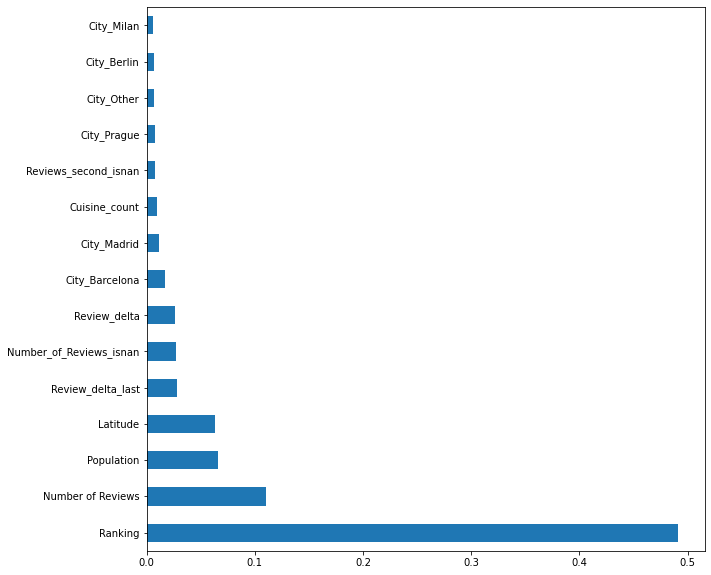

In [867]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')